In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [ ]:
from keras.preprocessing.sequence import pad_sequences
import keras
from keras.utils import to_categorical

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')

In [6]:
stop_words = set(stopwords.words("english"))

In [7]:
list(stop_words)[:20]

['again',
 'aren',
 'needn',
 'having',
 'ours',
 'because',
 'the',
 'were',
 'doing',
 'has',
 'shan',
 'yours',
 'this',
 'to',
 'that',
 'own',
 'where',
 'll',
 'myself',
 'whom']

In [8]:
train = pd.read_csv("~/Documents/Kaggle/ATIS-Airline-Travel-Information-System/archive/atis_intents_train.csv", header=None)
test = pd.read_csv("~/Documents/Kaggle/ATIS-Airline-Travel-Information-System/archive/atis_intents_test.csv", header=None)

In [9]:
train.head()

,0,1
0,atis_flight,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...


In [10]:
test.head()

,0,1
0,atis_flight,i would like to find a flight from charlotte ...
1,atis_airfare,on april first i need a ticket from tacoma to...
2,atis_flight,on april first i need a flight going from pho...
3,atis_flight,i would like a flight traveling one way from ...
4,atis_flight,i would like a flight from orlando to salt la...


### Removing stopwords

In [11]:
train['corpus'] = train[1].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
test['corpus'] = test[1].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

### Removing digits

In [12]:
train['corpus'] = train['corpus'].str.replace('\d+', '')
test['corpus'] = test['corpus'].str.replace('\d+', '')

In [13]:
train

,0,1,corpus
0,atis_flight,i want to fly from boston at 838 am and arriv...,want fly boston arrive denver morning
1,atis_flight,what flights are available from pittsburgh to...,flights available pittsburgh baltimore thursda...
2,atis_flight_time,what is the arrival time in san francisco for...,arrival time san francisco flight leaving was...
3,atis_airfare,cheapest airfare from tacoma to orlando,cheapest airfare tacoma orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...,round trip fares pittsburgh philadelphia dollars
5,atis_flight,i need a flight tomorrow from columbus to min...,need flight tomorrow columbus minneapolis
6,atis_aircraft,what kind of aircraft is used on a flight fro...,kind aircraft used flight cleveland dallas
7,atis_flight,show me the flights from pittsburgh to los an...,show flights pittsburgh los angeles thursday
8,atis_flight,all flights from boston to washington,flights boston washington
9,atis_ground_service,what kind of ground transportation is availab...,kind ground transportation available denver


In [14]:
train_corpus = train['corpus']
train_labels = train[0]

test_corpus = test['corpus']
test_labels = test[0]

In [15]:
train_labels.nunique()

8

## Tokenizing data

In [16]:
NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
kwargs = {
        'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
        'dtype': 'int32',
        'strip_accents': 'unicode',
        'decode_error': 'replace',
        'analyzer': TOKEN_MODE,  # Split text into word tokens.
}
vectorizer = TfidfVectorizer(**kwargs)

In [17]:
training = vectorizer.fit_transform(train_corpus)

/home/joaomariajaneiro/.local/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1813: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


In [18]:
print(vectorizer.get_feature_names())

['aa', 'aa depart', 'abbreviation', 'abbreviation canadian', 'abbreviation co', 'abbreviation dl', 'abbreviation ua', 'abbreviation us', 'abbreviations', 'able', 'able put', 'ac', 'across', 'across continent', 'actually', 'actually nonstop', 'actually want', 'advertises', 'advertises flights', 'afternoon', 'afternoon arrive', 'afternoon arrives', 'afternoon arriving', 'afternoon atlanta', 'afternoon baltimore', 'afternoon denver', 'afternoon economic', 'afternoon evening', 'afternoon first', 'afternoon flight', 'afternoon flights', 'afternoon going', 'afternoon leave', 'afternoon minneapolis', 'afternoon monday', 'afternoon need', 'afternoon nonstop', 'afternoon oakland', 'afternoon philadelphia', 'afternoon pittsburgh', 'afternoon please', 'afternoon show', 'afternoon thursday', 'afternoon time', 'afternoon tomorrow', 'afternoon tuesday', 'afternoon wednesday', 'afternoon what', 'afternoons', 'afterwards', 'air', 'air around', 'air arrive', 'air baltimore', 'air boston', 'air canada',

In [19]:
tf_idf_feature_names = vectorizer.get_feature_names()

df_tfidf = pd.DataFrame(data= training.toarray(), columns = tf_idf_feature_names)
df_tfidf

,aa,aa depart,abbreviation,abbreviation canadian,abbreviation co,abbreviation dl,abbreviation ua,abbreviation us,abbreviations,able,...,york san,york sunday,york toronto,york tower,york twa,york using,york vegas,york weekdays,york would,yyz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
np.argmax(training[0].todense())
tf_idf_feature_names[774]
temp_array = training.toarray()
for i in range(0, len(tf_idf_feature_names)):
  if temp_array[0][i] > 0:
    print(tf_idf_feature_names[i])

arrive
arrive denver
boston
boston arrive
denver
denver morning
fly
fly boston
morning
want
want fly


In [21]:
print(training.toarray().shape)
len(tf_idf_feature_names)

(4834, 6017)


6017

In [22]:
test = vectorizer.transform(test_corpus)

In [23]:
test.toarray().shape

(800, 6017)

## Split train into train/validation

In [24]:
X_train, X_val, y_train, y_val = train_test_split(training.toarray(), train_labels, test_size=0.2, random_state=1)

In [25]:
for i in range(0, len(tf_idf_feature_names)):
  if X_train[0][i] > 0:
    print(tf_idf_feature_names[i])

boston
boston june
business
business class
class
flights
flights boston
june
june twentieth
show
show flights
twentieth
twentieth business


In [26]:
le = preprocessing.LabelEncoder()
le.fit(y_train)

print(len(list(le.classes_)))
list(le.classes_)

8


['atis_abbreviation',
 'atis_aircraft',
 'atis_airfare',
 'atis_airline',
 'atis_flight',
 'atis_flight_time',
 'atis_ground_service',
 'atis_quantity']

In [27]:
y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_val.shape

(967,)

In [28]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_val.shape

(967, 8)

### Creating the model



In [47]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(len(tf_idf_feature_names),), kernel_regularizer='l2'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(500, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dense(8, activation="softmax")
])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 500)               3009000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 4008      
Total params: 3,263,508
Trainable params: 3,263,508
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Train on 3867 samples, validate on 967 samples
Epoch 1/30
3867/3867 [==============================] - 8s 2ms/step - loss: 2.6745 - acc: 0.7616 - val_loss: 0.9074 - val_acc: 0.7663
Epoch 2/30
3867/3867 [==============================] - 7s 2ms/step - loss: 0.8317 - acc: 0.8130 - val_loss: 0.8501 - val_acc: 0.8180
Epoch 3/30
3867/3867 [==============================] - 8s 2ms/step - loss: 0.7858 - acc: 0.8433 - val_loss: 0.7967 - val_acc: 0.8511
Epoch 4/30
3867/3867 [==============================] - 8s 2ms/step - loss: 0.7450 - acc: 0.8521 - val_loss: 0.7589 - val_acc: 0.8532
Epoch 5/30
3867/3867 [==============================] - 10s 2ms/step - loss: 0.7188 - acc: 0.8606 - val_loss: 0.7303 - val_acc: 0.8697
Epoch 6/30
3867/3867 [==============================] - 9s 2ms/step - loss: 0.6856 - acc: 0.8697 - val_loss: 0.7097 - val_acc: 0.8552
Epoch 7/30
3867/3867 [==============================] - 8s 2ms/step - loss: 0.6585 - acc: 0.8754 - val_loss: 0.6691 - val_acc: 0.8759
Epoch 8/30
386

In [34]:
print(history.history.keys())


dict_keys(['acc', 'val_acc', 'loss', 'val_loss'])


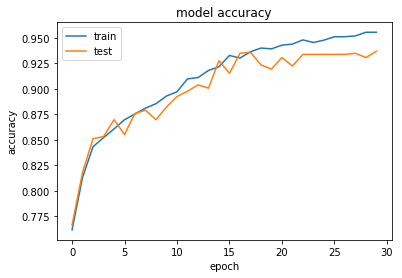

In [50]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

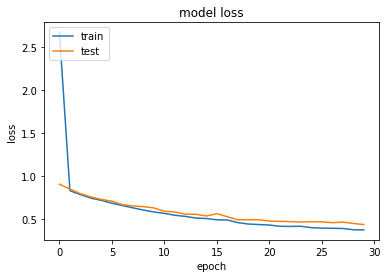

In [51]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
test_labels = le.transform(test_labels)
test_labels = to_categorical(test_labels)

In [52]:
test_loss, test_acc = model.evaluate(test.toarray(),  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)



Test accuracy: 0.96125


In [53]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=2)
print('\nTrain accuracy:', train_acc)


Train accuracy: 0.963537626220855
